TWIITER TWEET SENTIMENT ANALYSIS MINIPROJECT USING NLP AND ML BASIC

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/twitter_training.csv", header=None, names=['id','User', 'sentiment','tweet'])

# Explore the dataset

In [ ]:
print(df['sentiment'].value_counts())

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: sentiment, dtype: int64


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess(text):
    text=str(text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub('https?://[A-Za-z0-9./]+', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word.isalnum() and word not in stop_words]

    return ' '.join(words)

# Apply the preprocessing function to the 'tweet' column
df['preprocessed_text'] = df['tweet'].apply(preprocess)

# Check the result
print(df[['tweet', 'preprocessed_text']].head())


                                               tweet  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

               preprocessed_text  
0  im getting borderlands murder  
1            coming borders kill  
2    im getting borderlands kill  
3   im coming borderlands murder  
4  im getting borderlands murder  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['sentiment'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Train the model
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))


Accuracy: 0.6352681261297449
              precision    recall  f1-score   support

  Irrelevant       0.72      0.34      0.46      2592
    Negative       0.62      0.80      0.70      4519
     Neutral       0.64      0.53      0.58      3596
    Positive       0.63      0.72      0.67      4230

    accuracy                           0.64     14937
   macro avg       0.65      0.60      0.60     14937
weighted avg       0.65      0.64      0.62     14937



In [ ]:
# Example: Make predictions on new data
new_data = ["I don't like this product", "This is terrible."]
new_data_tfidf = tfidf_vectorizer.transform(new_data)
new_predictions = classifier.predict(new_data_tfidf)
print(new_predictions)


['Neutral' 'Negative']


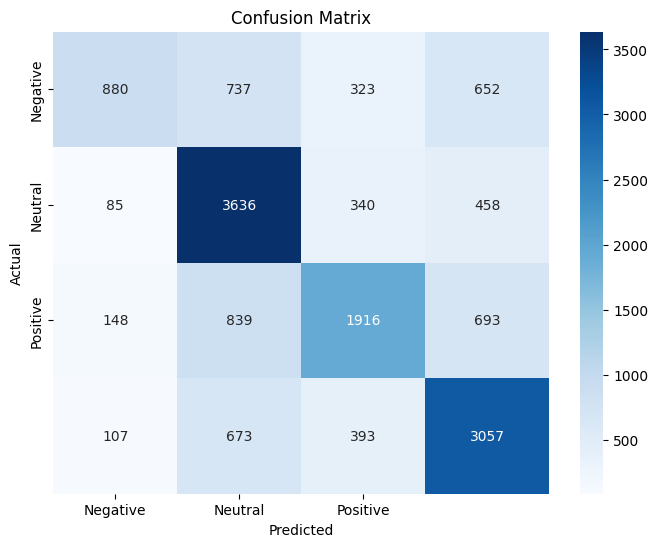

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and made predictions
# ...

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
